The code below makes sure that it constantly checks if there were changes in made in the `inverse_optim` package.

In [12]:
%load_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [14]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from inverse_optim import gen_data
from inverse_optim import research_plot
from inverse_optim import sancho
import tadasets
import tqdm
import powerbox as pbox

ModuleNotFoundError: No module named 'inverse_optim'

## Circle & Figure eight

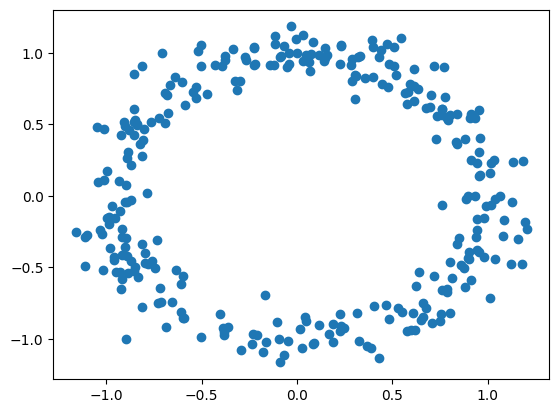

In [15]:
# This is a synthetic data set that we want "approximate"
N=300
goal_pts = tadasets.dsphere(n=N, d=1, noise=0.1) # circle
# goal_pts = tadasets.infty_sign(n=N, noise=0.1) # figure eight

# To perform Stochastic Gradient Descent (SGD), we need our set to be of tensor type
goal_pts = torch.tensor(goal_pts)

# Plot the initial/goal data set
P = goal_pts.detach().numpy()
plt.scatter(P[:, 0], P[:, 1])
plt.show()

With the code below, we do not use the sliced wasserstein distance as the loss function.

First we need to find out what is the optimal learning rate:

In [16]:
# Creation of the PD that we want to get to
goal_pd = gen_data.create_alpha_pd(goal_pts)

100%|██████████| 300/300 [00:07<00:00, 41.07it/s]


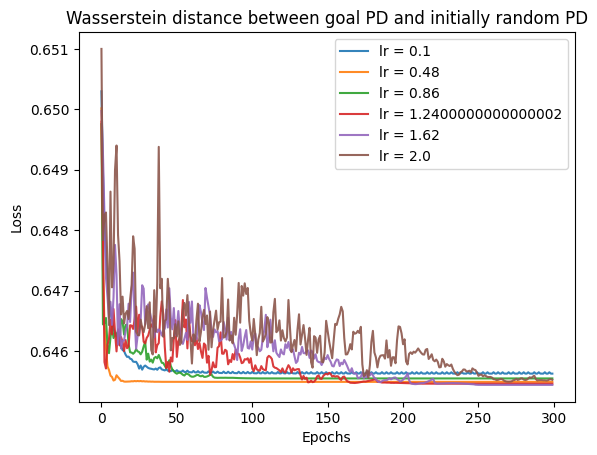

In [22]:
# Research on optimal learning rate
lr_list = np.linspace(0.1, 2, 6)
research_plot.research_lr(lr_list=lr_list, goal_pd=goal_pd, amount=N, dim=2, epochs=300, decay_speed=100)

# Research on movement of points
# research_plot.research_move(0.4, goal_pd=goal_pd, amount=N, dim=2, epochs=300, decay_speed=30)

After running the above code, plug in the best learning rate

 16%|█▌        | 95/600 [00:01<00:08, 61.83it/s]

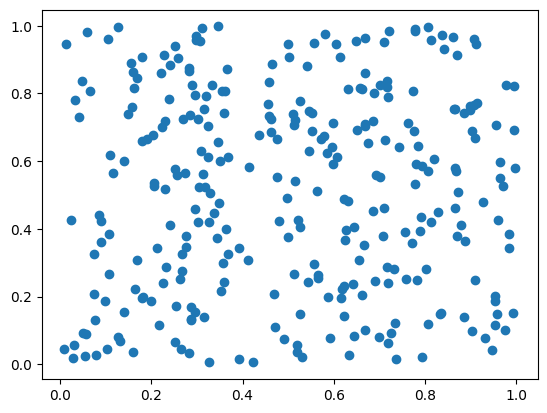

 32%|███▎      | 195/600 [00:03<00:07, 54.32it/s]

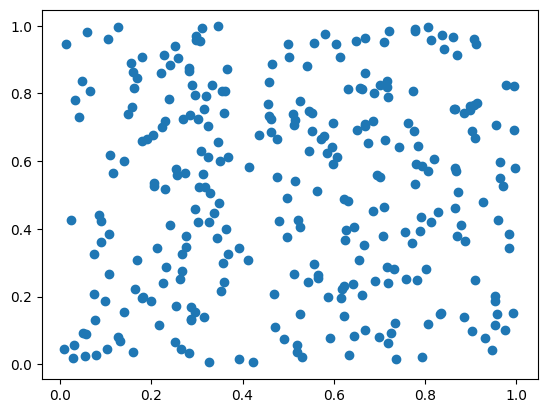

 50%|████▉     | 299/600 [00:05<00:04, 66.63it/s]

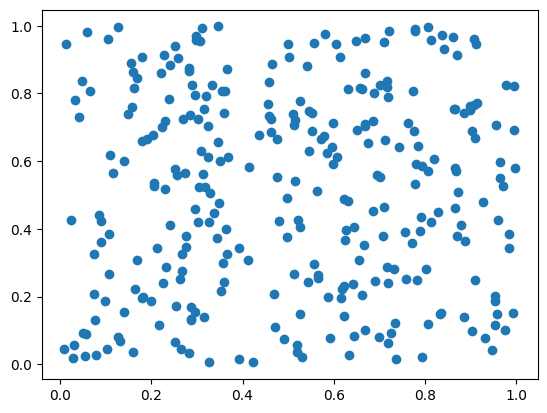

 66%|██████▌   | 397/600 [00:06<00:03, 61.46it/s]

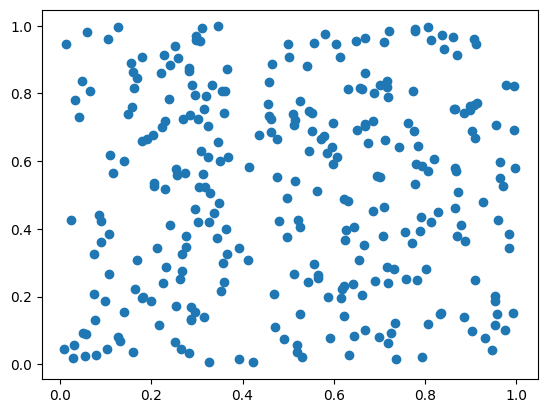

 82%|████████▏ | 493/600 [00:08<00:01, 58.54it/s]

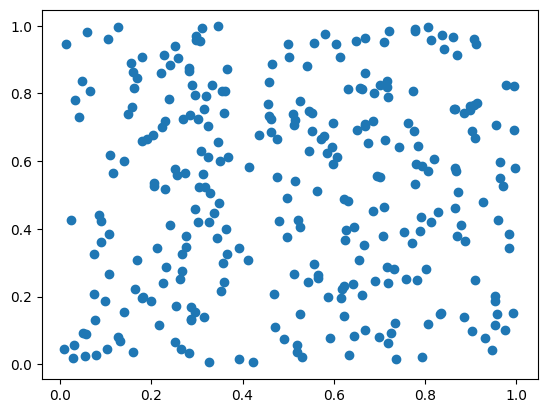

100%|█████████▉| 597/600 [00:10<00:00, 62.98it/s]

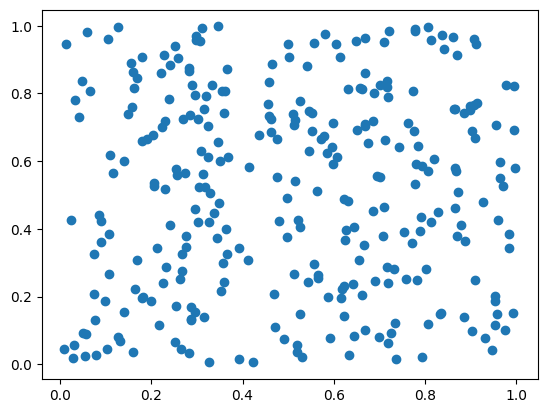

100%|██████████| 600/600 [00:10<00:00, 56.20it/s]


In [19]:
# Generation of new dataset
final_pts = gen_data.generate_data_alpha(goal_pd=goal_pd, amount=N, dim=2, lr=0.38, epochs=600, decay_speed=30, investigate=False)

With the code below, we use the sliced wasserstein distance

In [1]:
# Creation of the PD that we want to get to
goal_pd = gen_data.create_alpha_pd(goal_pts)

# Generation of new dataset
final_pts = gen_data.generate_data_alpha(goal_pd=goal_pd, amount=N, dim=2, lr=1.3, epochs=600, decay_speed=50, investigate=False, sliced=True)

# # Research on optimal learning rate
# lr_list = np.linspace(0.5, 1.8, 6)
# research_plot.research_lr(lr_list=lr_list, goal_pd=goal_pd, amount=N, dim=2, epochs=300, decay_speed=10, sliced=True)

# Research on movement of points
# research_plot.research_move(0.4, goal_pd=goal_pd, amount=N, dim=2, epochs=700, decay_speed=50)


NameError: name 'gen_data' is not defined

Compare the power spectra of generated circle and original circle

In [ ]:
goal_pts = goal_pts.detach().numpy()
final_pts = final_pts.detach().numpy()

In [11]:
# The number of grid points are also required when passing the samples
p_k_samples, bins_samples = pbox.get_power(goal_pts, 2.0, N=N)
p_k_samples_new, bins_samples_new = pbox.get_power(final_pts, 8.0, N=N)

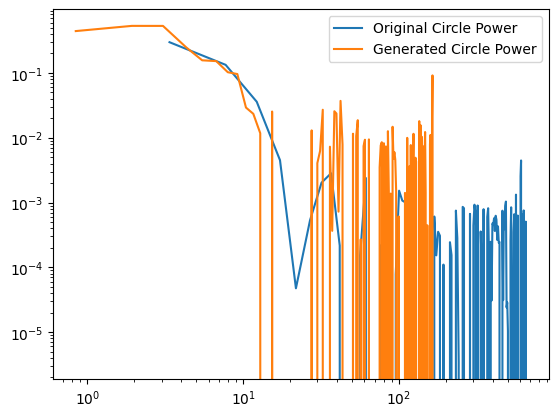

In [12]:
plt.plot(bins_samples, p_k_samples,label="Original Circle Power")
plt.plot(bins_samples_new, p_k_samples_new,label="Generated Circle Power")

plt.legend()
plt.xscale('log')
plt.yscale('log')

# Sancho

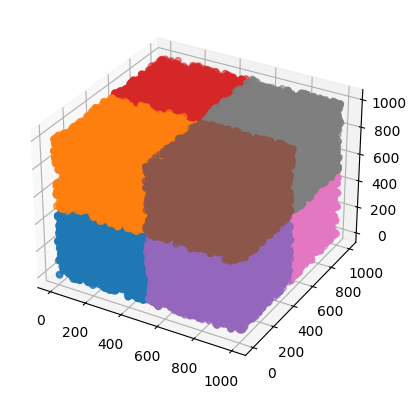

In [57]:
# Load dataset
cat = np.load(f'/Users/sliemela/Downloads/Sancho/fiducial_HOD_fid_NFW_sample0_1Gpc_z0.50_RSD3_run0.npz')
pos = cat['pos']        # shape: (N_galaxies, 3) --> X,Y,Z position of each galaxy in Mpc/h
vel = cat['vel']        # shape: (N_galaxies, 3) --> Vx, Vy, Vz velocity of the galaxy in km/s
gtype = cat['gtype']

# Split up the dataset
split = (2,2,2)
bins = sancho.bin(pos, split)

# Plotting the bins
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for x in bins:
    if len(x) != 0:
        ax.scatter3D(x[:, 0], x[:, 1], x[:, 2])

In [58]:
# Calculating the statistics of the wasserstein distances of sancho
list_of_wasser_dist = sancho.compare_wasser_alpha(bins)

wasser_mean = np.mean(list_of_wasser_dist)
wasser_std = np.std(list_of_wasser_dist)

print(wasser_mean)
print(wasser_std)

# NOTE: the code of compare_wasser_alpha has been changed to only consider the first 3000. In the future, we may consider all pairs. 

  0%|          | 0/28 [00:00<?, ?it/s]

: 

: 

# Experiment

## Periodic boundary conditions experiment

Experiment to fix boundary conditions. Currently failed.

In [11]:
N=100
y = tadasets.dsphere(n=N, d=1, noise=0.1)

# Translate whole point set so that nothing is negative
x = np.min(y)
y = y - x

# Create periodic boundaries
z = np.max(y)


# To perform Stochastic Gradient Descent (SGD), we need our set to be of tensor type
y = torch.tensor(y)

# Plot the initial/goal data set
# P = y.detach().numpy()
# plt.scatter(P[:, 0], P[:, 1])
# plt.show()

# Creation of the PD that we want to get to
goal_pd = gen_data.create_alpha_pd(y)
epochs = 300
# # Generation of new dataset
# lr_list = np.linspace(4,10,5)
# for lr in lr_list:
#     _, loss_list, _, _, _ = \
#         gen_data.per_generate_data_alpha(goal_pd=goal_pd, amount=N, dim=2, lr=1.5, epochs=epochs, per1=z, per2=x, decay_speed=10, investigate=True)
    
#     # Loss research
#     plt.plot(range(epochs), loss_list, label=f"lr = {lr}", alpha=0.9)

# # Loss research
# plt.title("Wasserstein distance between goal PD and initially random PD")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(loc="upper right")
# plt.show()


final_pts = gen_data.per_generate_data_alpha(goal_pd=goal_pd, amount=N, dim=2, lr=8.5, epochs=epochs, per1=z, per2=x, decay_speed=30, investigate=False)



NameError: name 'tadasets' is not defined

In [1]:
%pip install sympy


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solutions = solve(x**5 - x - 1, dict=True)

In [10]:
numeric_solutions = [solution[x].evalf(5) for solution in solutions]
print(numeric_solutions)


[1.1673, -0.76488 - 0.35247*I, -0.76488 + 0.35247*I, 0.18123 - 1.084*I, 0.18123 + 1.084*I]
